# **Project 2 Report**

Nick Alvarez

CS458

## **P2-1. Decision Tree**

**(a) Develop a decision tree based classifier to classify the 3 different types  of Iris (Setosa, Versicolour, and Virginica).**

I use support vector classification here. Each run gets scored with the cross validation score.

**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree. Plot your decision tree.**

Accuracy of five-fold cross validation is  0.9783333333333333
Accuracy of hyperparameter tuning is  0.9666666666666668
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
[[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]


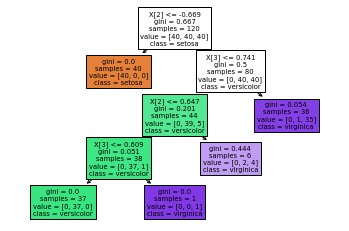

In [8]:
from sklearn import datasets, model_selection, tree, metrics, svm, preprocessing
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

# (a) Develop classifier
iris = datasets.load_iris()
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(iris.data, iris.target)
#tree.plot_tree(clf, filled=True, class_names=iris.target_names)
#plt.show()

# (b) Cross validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.1, random_state=0)

avgAccuracy = 0.0
skf = model_selection.StratifiedKFold(n_splits=5)
skf.get_n_splits(iris.data, iris.target)
for train_index, test_index in skf.split(iris.data, iris.target):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    clf = svm.SVC(kernel='linear', C=1, random_state=42)
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5)
    #print(scores)
    avgAccuracy += np.average(scores)
avgAccuracy /= 5
print("Accuracy of five-fold cross validation is ", avgAccuracy)

max_depth_range = [None, 2, 5, 10]
min_samples_leaf_range = [1, 5, 10]
min_sample_split_range = [2, 10, 20]
min_leaf_nodes_range = [None, 5, 10, 20]

param_grid = {"criterion": ['gini'],
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "min_samples_split": min_sample_split_range,
              "max_leaf_nodes": min_leaf_nodes_range
              }

grid = model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', refit=True)

clf = make_pipeline(preprocessing.StandardScaler(), grid)
clf.fit(X_train, y_train)
print("Accuracy of hyperparameter tuning is ", grid.best_score_)
print(grid.best_params_)
y_pred = grid.best_estimator_.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
tree.plot_tree(grid.best_estimator_, filled=True, class_names=iris.target_names)
plt.show()

I change the ranges for these parameters based on arbitrary values - each combination is tested and the grid search cross validation reports back which is best. This best tree is then used to predict classes for the test set.

# **P2-2. Model Overfitting**

**(a) Generate the dataset as in slide 56 in Chapter 3**

**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

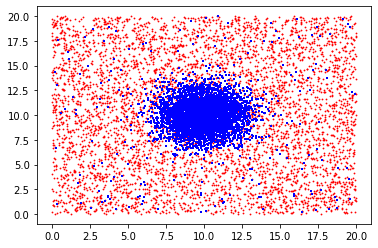

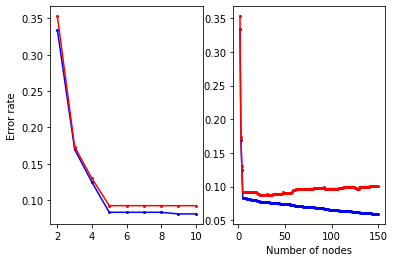

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, tree, metrics

# Generate dataset
## 5000 instances (Gaussian)
gaus_center = np.random.normal(loc=np.array([10,10]), scale=np.sqrt(2), size=(5000,2))
### 200 instances (Uniform)
gaus_noise = np.random.uniform(low=0, high=20, size=(200,2))
c1 = np.concatenate((gaus_center, gaus_noise), axis=0)

## 5200 instances (Uniform)
c2 = np.random.uniform(low=0, high=20, size=(5200,2))

plt.scatter(c2[:, 0], c2[:, 1], c='red', marker='.', s=2.5)
plt.scatter(c1[:, 0], c1[:, 1], c='blue', marker='+', s=2.5)

fig, axs = plt.subplots(1,2)

c3 = np.concatenate((c1,c2), axis=0)
c3_target = np.concatenate((np.zeros((c1.shape[0],1)), np.ones((c2.shape[0],1))), axis=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(c3, c3_target, test_size=0.1, random_state=0, shuffle=True)

TrainError = np.empty((0,2))
TestError = np.empty((0,2))
for nodes in range(2, 151):
  clf = tree.DecisionTreeClassifier(max_leaf_nodes=nodes)
  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  TrainError = np.append(TrainError, np.array([(nodes, 1-metrics.accuracy_score(y_train, y_pred_train))]), axis=0)
  TestError = np.append(TestError, np.array([(nodes, 1-metrics.accuracy_score(y_test, y_pred_test))]), axis=0)

axs[0].plot(TrainError[:9, 0], TrainError[:9, 1], c='blue', marker='o', markersize=2)
axs[0].plot(TestError[:9, 0], TestError[:9, 1], c='red', marker='o', markersize=2)
axs[1].plot(TrainError[:, 0], TrainError[:, 1], c='blue', marker='o', markersize=2)
axs[1].plot(TestError[:, 0], TestError[:, 1], c='red', marker='o', markersize=2)
axs[1].set_xlabel("Number of nodes")
axs[0].set_ylabel("Error rate")
plt.show()

The model does well when there is a small number of nodes. However, it overfits with a larger number of nodes (too complex) because it is so finely tuned to the training data that it cannot generalize itself to the test data.

# **P2-3. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree.**

In [1]:
from os import pipe
import numpy as np
from sklearn import datasets, tree, model_selection, metrics, preprocessing, pipeline
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt

# (a) load newsgroups
ng_train = datasets.fetch_20newsgroups(subset='train', categories=['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'], remove=('headers', 'footers', 'quotes'))
ng_test = datasets.fetch_20newsgroups(subset='test', categories=['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'], remove=('headers', 'footers', 'quotes'))

print(f'''
Set\t_|_ # Docs\t_|_ Attributes''')

# (b) decision tree

max_depth_range = [None, 2, 5, 10]
min_samples_leaf_range = [1, 5, 10]
min_sample_split_range = [2, 10, 20]
min_leaf_nodes_range = [None, 5, 10, 20]

param_grid = {"clf__criterion": ['gini'],
              "clf__max_depth": [10],
              "clf__min_samples_leaf": [1, 5, 10],
              "clf__min_samples_split": [20],
              "clf__max_leaf_nodes": [None, 5, 10, 20]
              }

pipe_ = Pipeline([('vect', TfidfVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', tree.DecisionTreeClassifier())])

#grid = model_selection.RandomizedSearchCV(estimator=pipe_, param_distributions=param_grid, scoring='accuracy', refit=True, verbose=True)

# RandomizedSearchCV results.
# {*'clf__min_samples_split': 20, 'clf__min_samples_leaf': 1, 'clf__max_leaf_nodes': None, *'clf__max_depth': 10, 'clf__criterion': 'gini'}

# Optimized results from adjusted param_grid and GridSearchCV.
# {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_leaf_nodes': None, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 20}

grid = model_selection.GridSearchCV(estimator=pipe_, param_grid=param_grid, scoring='accuracy', refit=True, verbose=True)

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english',)
x_train = vectorizer.fit_transform(ng_train.data)

print(f'''Train\t |  {ng_train.target.shape[0]}\t |  {x_train.shape[1]}
Test\t |  {ng_test.target.shape[0]}\t |  N/A''')

grid.fit(ng_train.data, ng_train.target)
print(grid.best_params_)
y_pred = grid.best_estimator_.predict(ng_test.data)
print(metrics.confusion_matrix(ng_test.target, y_pred))

#tree.plot_tree(grid.best_estimator_['clf'], filled=True, class_names=ng_test.target_names)
#plt.show()


Set	_|_ # Docs	_|_ Attributes
Train	 |  2148	 |  26562
Test	 |  1430	 |  N/A
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_leaf_nodes': None, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 20}
[[192   1 196   0]
 [ 18 164 214   0]
 [  4   4 385   1]
 [  6   8 185  52]]


Running a Grid Search on such a large number of parameters was far too costly (720 candidates!). I chose to start with a Random Search to get an idea of which parameters worked well. Commented code shows the best parameters found via this method, using the lists above `param_grid`.

With this in mind, I then reduced the Grid Search to two options per parameter. Further testing showed that some parameters did not change (marked with * in the comment) and some did. These "changed" parameters were then allowed all original options from the list and Grid Search was run. The optimized parameters were displayed - very close to what the Random Search found!